In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

In [26]:
fastai_types

{typing.Callable[[numbers.Number, numbers.Number, float], numbers.Number]: 'AnnealFunc',
 typing.Collection[typing.Any]: 'ArgStar',
 typing.Collection[typing.Tuple[typing.Collection[int], int]]: 'BatchSamples',
 typing.Collection[pathlib.Path]: 'FilePathList',
 typing.Union[float, typing.Collection[float]]: 'Floats',
 str: 'ImgLabel',
 typing.Collection[str]: 'StrList',
 typing.Callable[[int], int]: 'KeyFunc',
 typing.Dict[str, typing.Any]: 'KWArgs',
 typing.Union[typing.Collection[typing.Any], int, float, str]: 'ListOrItem',
 typing.Collection[typing.Callable[[str], str]]: 'ListRules',
 typing.Collection[typing.Tuple[int, int]]: 'ListSizes',
 typing.Collection[typing.Union[numpy.ndarray, list]]: 'NPArrayableList',
 typing.Collection[numpy.ndarray]: 'NPArrayList',
 numpy.ndarray: 'NPImage',
 typing.Union[pandas.core.frame.DataFrame, NoneType]: 'OptDataFrame',
 typing.Union[typing.Collection[typing.Any], int, float, str, NoneType]: 'OptListOrItem',
 typing.Union[typing.Tuple[float, floa

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [166]:
n=100

In [167]:
torch.ones(5,2)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [169]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
#x[:,1] = x[:,0] ** 2
x[:5]

tensor([[ 0.9104,  1.0000],
        [-0.4047,  1.0000],
        [ 0.6337,  1.0000],
        [-0.9472,  1.0000],
        [ 0.2741,  1.0000]])

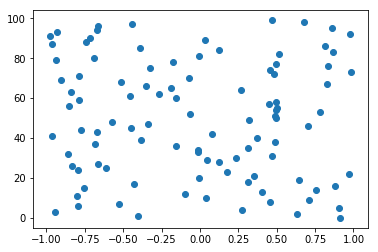

In [170]:
plt.scatter(x[:,0], range(0, len(x[:,0])))

In [174]:
a = tensor(1.5,2); a

tensor([1.5000, 2.0000])

In [175]:
print(x.size())
print(a.size())
print((x@a).size())
print(torch.rand(n).size())

torch.Size([100, 2])
torch.Size([2])
torch.Size([100])
torch.Size([100])


tensor([3.3657, 1.3930, 2.9505, 0.5792, 2.4111, 3.3609, 0.8085, 1.2056, 2.6865,
        3.0652, 2.0572, 0.7950, 1.8526, 2.6049, 3.1321, 0.8671, 3.3199, 1.3543,
        2.4730, 2.9700, 1.9931, 2.5246, 3.4537, 2.2641, 0.8114, 1.0862, 0.7523,
        1.0039, 2.1829, 2.0675, 2.3531, 2.7066, 0.7135, 1.9779, 1.9768, 2.4657,
        1.7680, 0.9752, 2.7367, 1.4250, 2.5616, 0.5513, 2.1167, 0.9949, 0.8367,
        1.3241, 3.0536, 1.4905, 1.1453, 2.4815, 2.7410, 2.7299, 1.9047, 3.1730,
        2.7442, 2.7560, 0.7187, 2.6728, 2.7476, 0.8156, 1.7630, 1.3207, 1.6031,
        0.7372, 2.4015, 1.7165, 1.4756, 3.2370, 1.2291, 0.6390, 1.8950, 0.8193,
        2.7283, 3.4789, 2.6804, 1.5101, 3.2482, 2.7392, 1.7410, 0.5937, 0.9678,
        1.9930, 2.7719, 3.3001, 2.1874, 1.4180, 3.2209, 0.5584, 0.8869, 2.0485,
        0.9293, 0.5316, 3.4664, 0.6027, 0.9980, 3.2894, 1.0014, 1.3334, 3.0201,
        2.7040])

In [178]:
y = (x@a) + (x[:,0]**2) * 3 + torch.rand(n)

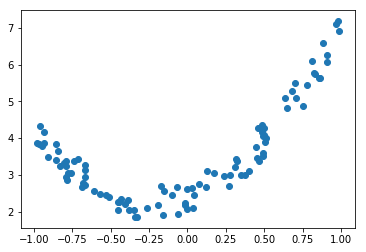

In [179]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [180]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [181]:
a = tensor(-1.,1)

In [182]:
y_hat = x@a
mse(y_hat, y)

tensor(9.2235)

In [183]:
lala = mse(y_hat, y)

In [184]:
a

tensor([-1.,  1.])

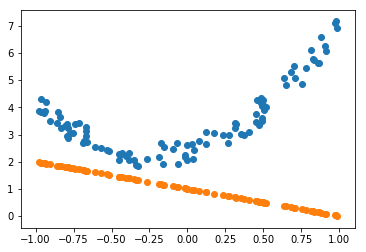

In [185]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [186]:
a = tensor(-1.,1)
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [187]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [188]:
lr = .1
for t in range(100): update()

tensor(9.2235, grad_fn=<MeanBackward1>)
tensor(1.5770, grad_fn=<MeanBackward1>)
tensor(1.1357, grad_fn=<MeanBackward1>)
tensor(1.0535, grad_fn=<MeanBackward1>)
tensor(1.0357, grad_fn=<MeanBackward1>)
tensor(1.0318, grad_fn=<MeanBackward1>)
tensor(1.0309, grad_fn=<MeanBackward1>)
tensor(1.0308, grad_fn=<MeanBackward1>)
tensor(1.0307, grad_fn=<MeanBackward1>)
tensor(1.0307, grad_fn=<MeanBackward1>)


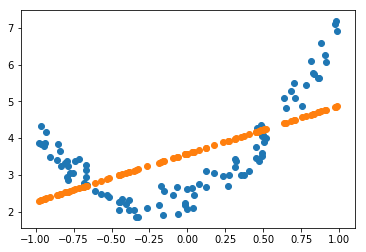

In [189]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [190]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [192]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=10)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.